In [2]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#filter for data analyst
df_DA = df[df['job_title_short']== 'Data Analyst'].copy()

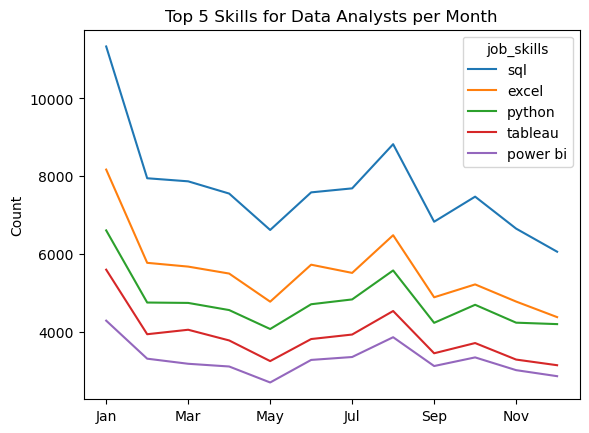

In [5]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')

#using fill value to replace NaN values with 0
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

#creating a column that sums up all the values by creating new column total
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

#sorting total values
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

#dropping total column so we can plot it
df_DA_pivot = df_DA_pivot.drop('Total')

#use month names to plot it
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot.iloc[:, :5].plot(kind='line') #using all rows but only 5 columns
plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

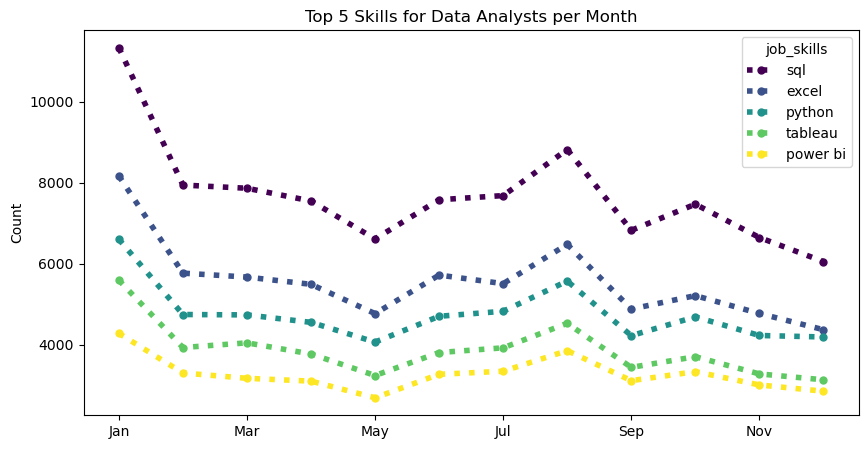

In [12]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth = 4,
    linestyle = ':',
    colormap='viridis',
    marker = 'o',
    markersize=5,
    figsize=(10,5)
    )

plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# Customising Scatterplot from 15_Matplotlib_Scatter_Plots.ipynb

In [17]:
df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count') #putting in a tuple because of agg() structure and also it will make title non changable
)

#Limit top 20 skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


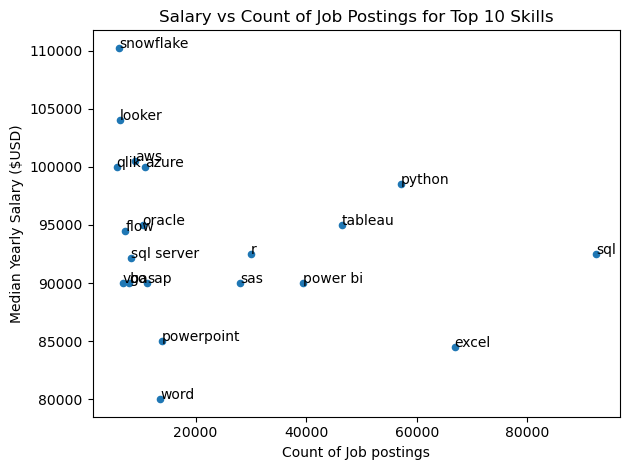

In [18]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()

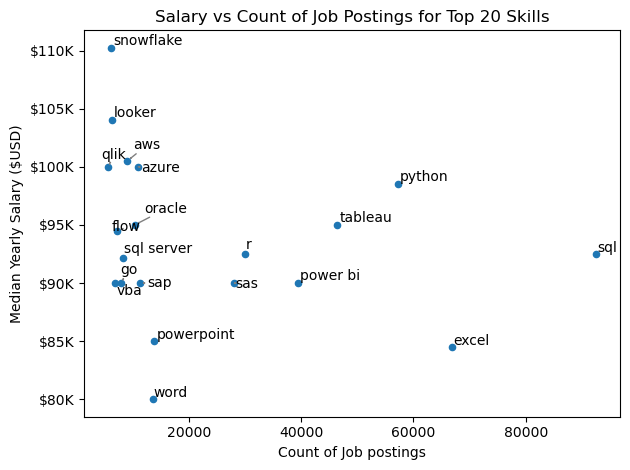

In [32]:
from adjustText import adjust_text

# fig, ax = plt.subplots()

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

texts = [] #defining an emty list and later appending x, y values inside empty list

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))
#gettingbcurrent axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title(f'Salary vs Count of Job Postings for Top {skill_count} Skills')
plt.xlabel('Count of Job postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.tight_layout()

plt.show()